In [1]:
import tensorflow as tf
import numpy as np

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
# Define the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [3]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [4]:
# Train the model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 2.2010 - accuracy: 0.7389
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5722 - accuracy: 0.8369
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4842 - accuracy: 0.8663
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4318 - accuracy: 0.8774
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4071 - accuracy: 0.8892


In [5]:
# Predict the labels of test images
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [6]:
# Evaluate the model
accuracy = model.evaluate(x_test, y_test)
print("Accuracy: ", accuracy[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3657 - accuracy: 0.9222
Accuracy:  0.9222000241279602


In [8]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42)

# Tampilkan shape dari data latih dan data uji
print('Shape x_train:', x_train.shape)
print('Shape x_test:', x_test.shape)
print('Shape y_train:', y_train.shape)
print('Shape y_test:', y_test.shape)


Shape x_train: (48000, 28, 28)
Shape x_test: (12000, 28, 28)
Shape y_train: (48000,)
Shape y_test: (12000,)


In [9]:
from sklearn.model_selection import train_test_split
from keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Memisahkan data latih dan data uji dengan perbandingan 80% dan 20%
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Reshape and normalize the input data
x_train = x_train.reshape((x_train.shape[0], -1)) / 255.0
x_val = x_val.reshape((x_val.shape[0], -1)) / 255.0

# Define the model
model = models.Sequential([
    layers.Flatten(input_shape=(784,)),  # Flatten the input images
    layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    layers.Dropout(0.2),  # Dropout for regularization
    layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (for 0-9 digits)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test.reshape((x_test.shape[0], -1)) / 255.0, y_test)

print("\nTest Accuracy:", test_accuracy)


Epoch 1/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3213 - accuracy: 0.9076 - val_loss: 0.1641 - val_accuracy: 0.9524
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1566 - accuracy: 0.9535 - val_loss: 0.1166 - val_accuracy: 0.9660
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1171 - accuracy: 0.9646 - val_loss: 0.1024 - val_accuracy: 0.9702
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0938 - accuracy: 0.9713 - val_loss: 0.0955 - val_accuracy: 0.9707
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0881 - accuracy: 0.9729

Test Accuracy: 0.9728999733924866


In [11]:
# Prediksi label gambar pada data uji menggunakan model yang telah dilatih
predictions = model.predict(x_test.reshape((x_test.shape[0], -1)) / 255.0)

# Ambil label dengan nilai tertinggi sebagai prediksi
predicted_labels = tf.argmax(predictions, axis=1).numpy()

# Tampilkan beberapa contoh prediksi dan label sebenarnya
for i in range(10):
    print(f"Prediksi: {predicted_labels[i]}, Label Sebenarnya: {y_test[i]}")

313/313 [==============================] - 1s 2ms/step
Prediksi: 7, Label Sebenarnya: 7
Prediksi: 2, Label Sebenarnya: 2
Prediksi: 1, Label Sebenarnya: 1
Prediksi: 0, Label Sebenarnya: 0
Prediksi: 4, Label Sebenarnya: 4
Prediksi: 1, Label Sebenarnya: 1
Prediksi: 4, Label Sebenarnya: 4
Prediksi: 9, Label Sebenarnya: 9
Prediksi: 6, Label Sebenarnya: 5
Prediksi: 9, Label Sebenarnya: 9


In [12]:
from sklearn.metrics import accuracy_score

# Ambil label dengan nilai tertinggi sebagai prediksi
predicted_labels = tf.argmax(predictions, axis=1).numpy()

# Hitung akurasi menggunakan metrik evaluasi dari scikit-learn
accuracy = accuracy_score(y_test, predicted_labels)

print("Akurasi model:", accuracy)


Akurasi model: 0.9729


In [13]:
# Evaluasi model pada data uji
test_loss, test_accuracy = model.evaluate(x_test.reshape((x_test.shape[0], -1)) / 255.0, y_test)

print("Akurasi model:", test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0881 - accuracy: 0.9729
Akurasi model: 0.9728999733924866


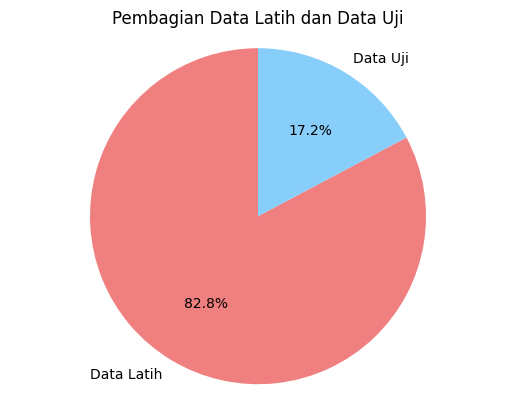

In [15]:
import matplotlib.pyplot as plt

# Jumlah data latih dan data uji
train_size = len(x_train)
test_size = len(x_test)

# Persentase data latih dan data uji
train_percentage = (train_size / (train_size + test_size)) * 100
test_percentage = (test_size / (train_size + test_size)) * 100

# Membuat grafik pie chart
labels = 'Data Latih', 'Data Uji'
sizes = [train_percentage, test_percentage]
colors = ['lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Memastikan bahwa pie chart berbentuk lingkaran
plt.title('Pembagian Data Latih dan Data Uji')

# Menampilkan grafik
plt.show()
